In [1]:
import h5py
import numpy as np

# data directory + file
dir = "/Users/Victini/Downloads/POSEIDON_development/reference_data/observations/WASP-121b/MyFinalExt_WASP-121_t1_2016-12-26.h5"
chips = "blue redl redu".split()
d = {}

In [2]:
file = h5py.File("./data/WASP-121b.h5", "a")
file["blue"].keys()

<KeysViewHDF5 ['Bs', 'flux', 'flux_blaze_corrected', 'phi', 'residuals', 'transit_weight', 'uncertainties', 'wl_grid']>

In [5]:
import matplotlib.pyplot as plt

phi = file["blue"]["phi"]
file["blue/phi"][:] = file["blue"]["phi"]
file["redl/phi"][:] = file["blue"]["phi"]
file["redu/phi"][:] = file["blue"]["phi"]
file.close()

In [ ]:
# def airtovac(wlnm):
#     # Convert wavelengths (nm) in air to wavelengths in vaccuum (empirical).
#     wlA = wlnm * 10.0
#     s = 1e4 / wlA
#     n = 1 + (
#         0.00008336624212083
#         + 0.02408926869968 / (130.1065924522 - s**2)
#         + 0.0001599740894897 / (38.92568793293 - s**2)
#     )
#     return wlA * n / 10.0

In [6]:
# get/organise the data
with h5py.File(dir, "r") as F:
    for chip in chips:
        # Note that doppler.Eldin_AirToVacuum converts from air to vacuum wavelength - let me know if you want the code.
        # d['Wvac/{}'.format(chip)] = doppler.Eldin_AirToVacuum(F['blaze/{}/wl'.format(chip)][:])
        # d['C_blaze/{}'.format(chip)] = F['blaze/{}/spec'.format(chip)][:].transpose((1,0,2))
        # d['Ce_blaze/{}'.format(chip)] = F['blaze/{}/spec_err'.format(chip)][:].transpose((1,0,2))
        d["C/{}".format(chip)] = F["clean/{}/spec".format(chip)][:].transpose((1, 0, 2))
        d["Ce/{}".format(chip)] = F["clean/{}/spec_err".format(chip)][:].transpose(
            (1, 0, 2)
        )
        d["wl/{}".format(chip)] = F["clean/{}/wl".format(chip)][:]
        # aligned_wl = airtovac(wlnm) * 10  # aligned wl in A again

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/Victini/Downloads/POSEIDON_development/reference_data/observations/WASP-121b/MyFinalExt_WASP-121_t1_2016-12-26.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [4]:
import matplotlib.pyplot as plt

In [8]:
wl_blue, wl_redl, wl_redu = [
    d["wl/{}".format(chip)] / 1e4 for chip in chips
]  # convert to microns
wl_redl = wl_redl[6:-2, :-31]
wl_redu = wl_redu[1:-1, :-32]
wl_blue = wl_blue[:-1, :-26]

In [9]:
import dill

data_dir = "/Users/Victini/Downloads/POSEIDON_development/reference_data/observations/WASP-121b/"
pl_dat = dill.load(open("{}/planet_info_py3.dill".format(data_dir), "rb"))
print(pl_dat.keys())
phi = np.delete(pl_dat["ph1"], (69, 70, 71))

dict_keys(['ph1', 'ph2', 'tpar1', 'tpar2', 'tmodel1', 'tmodel2', 'p_vel1', 's_vel1', 'p_vel2', 's_vel2', 'Ks', 'Kp', 'tdur', 'gamma', 'bv1', 'bv2'])


In [10]:
# These data are both in the rest frame of the star. The blue data are aligned with cross-correlation to stellar lines, and the red data are aligned via cross-correlation with a telluric template (however, in the latter case we also shift/interpolate according to the barycentric and systemic velocities to compensate)
al = np.load(
    "/Users/Victini/Downloads/POSEIDON_development/reference_data/observations/WASP-121b/aligned_C_arrays.npz"
)

# And the aligned data are stored as:
C_blue, C_redl, C_redu = (
    al["aligned/blue/C"],
    al["aligned/redl/C"],
    al["aligned/redu/C"],
)  # etc, replace blue with redl/redu
# And just to be extra confusing, I've already stripped out the 70,71,72 frames. (But not the outer orders)
C_redl = C_redl[6:-2][:, :, :-31]
C_redu = C_redu[1:-1][:, :, :-32]
C_blue = C_blue[:-1][:, :, :-26]

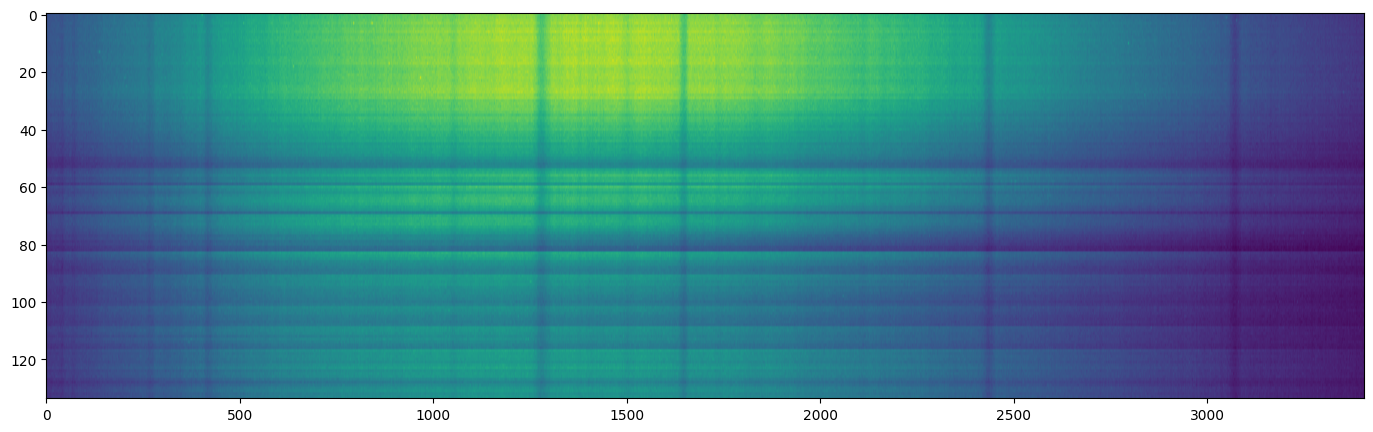

In [12]:
plt.figure(figsize=(17, 5))
plt.imshow(C_redl[-1], aspect="auto")

In [ ]:
file = h5py.File("test.h5", "w")

In [ ]:
redl = file.create_group("redl")

redl.create_dataset(
    "wl_grid", data=wl_redl, dtype="float"
)  # Writing data to the dataset
redl.create_dataset("flux", data=C_redl, dtype="float")
redl.create_dataset("phi", data=phi, dtype="float")

redu = file.create_group("redu")

redu.create_dataset(
    "wl_grid", data=wl_redu, dtype="float"
)  # Writing data to the dataset
redu.create_dataset("flux", data=C_redu, dtype="float")
redu.create_dataset("phi", data=phi, dtype="float")

blue = file.create_group("blue")

blue.create_dataset(
    "wl_grid", data=wl_blue, dtype="float"
)  # Writing data to the dataset
blue.create_dataset("flux", data=C_blue, dtype="float")
blue.create_dataset("phi", data=phi, dtype="float")
file.close()

In [18]:
dataset = h5py.File("./WASP-121.h5", "a")
dataset.close()